In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt

In [5]:
# Loading Data
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal', 'heartdisease']
clivelandData = pd.read_csv('Dataset/cleveland.csv', names = features)
hungarianData = pd.read_csv('Dataset/hungarian.csv', names = features)
switzerlandData = pd.read_csv('Dataset/switzerland.csv', names = features)

datatemp = [clivelandData, hungarianData, switzerlandData]
data = pd.concat(datatemp)

<AxesSubplot:>

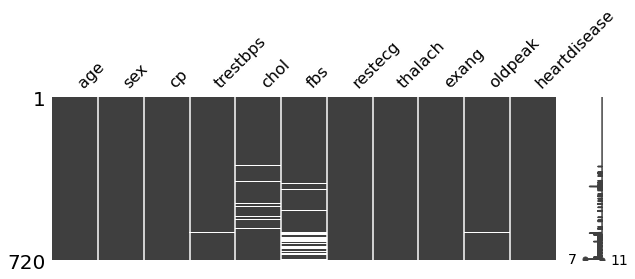

In [7]:
# Missing Data Detection
data = data.drop(['slop', 'ca', 'thal'], axis=1)
data = data.replace('?', np.nan)

msno.matrix(data, figsize=(10, 3))

<AxesSubplot:xlabel='sex', ylabel='heartdisease'>

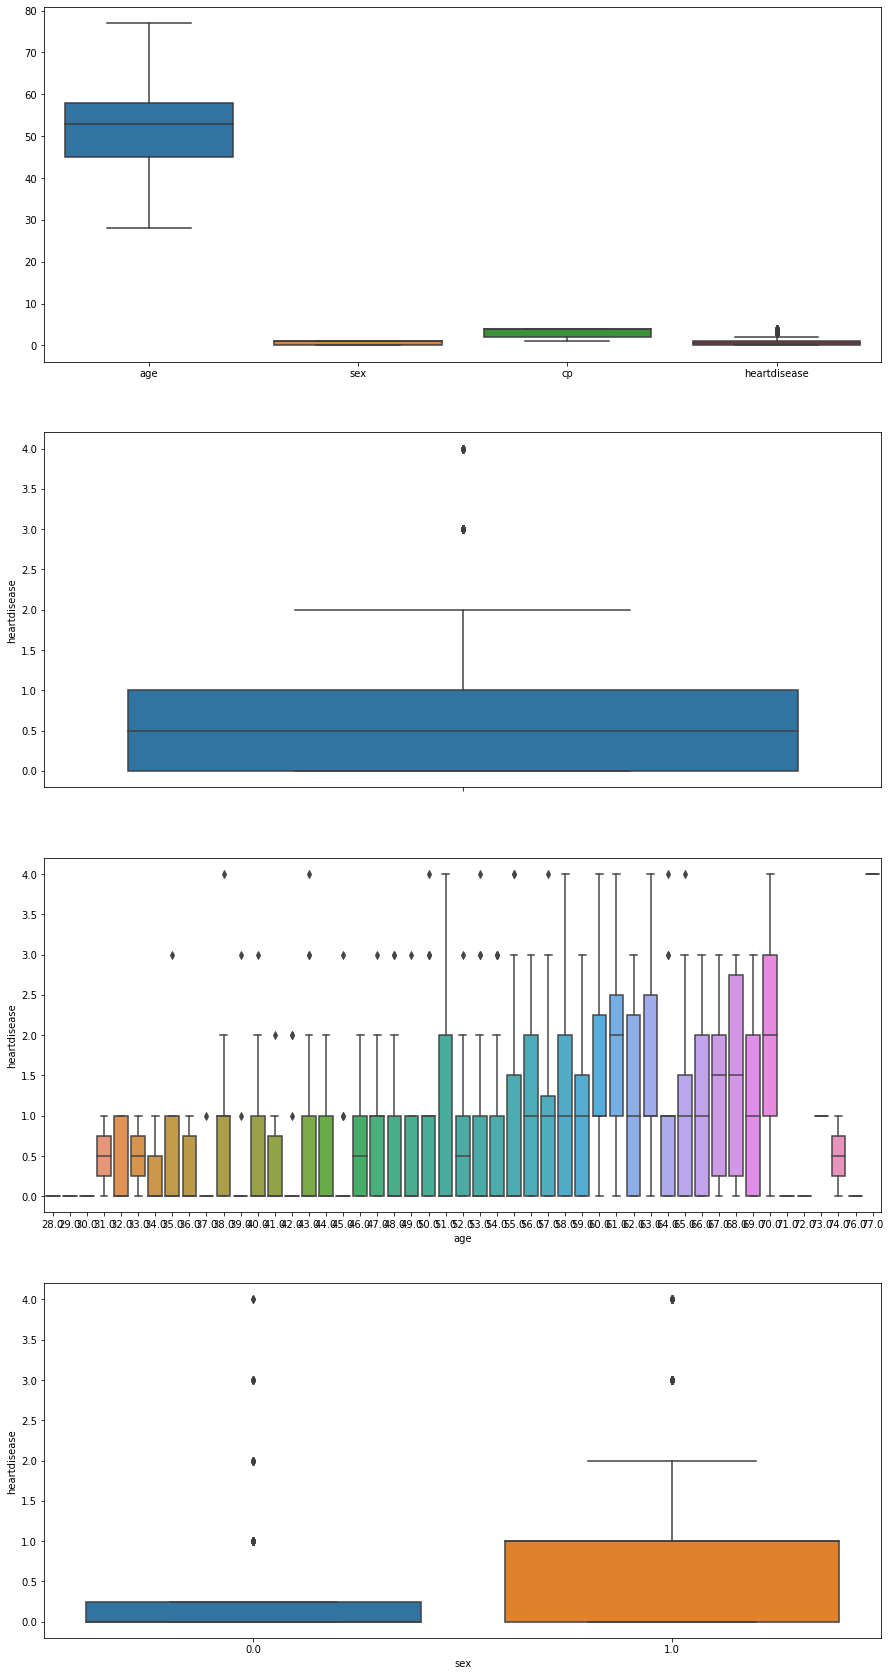

In [9]:
# Outliners Detection and Class Imbalance
fig, axes = plt.subplots(nrows=4, ncols=1)
fig.set_size_inches(15, 30)
sn.boxplot(data=data, orient="v", ax=axes[0])
sn.boxplot(data=data, y="heartdisease", orient="v", ax=axes[1])
sn.boxplot(data=data, y="heartdisease", x="age", orient="v", ax=axes[2])
sn.boxplot(data=data, y="heartdisease", x="sex", orient="v", ax=axes[3])

<AxesSubplot:>

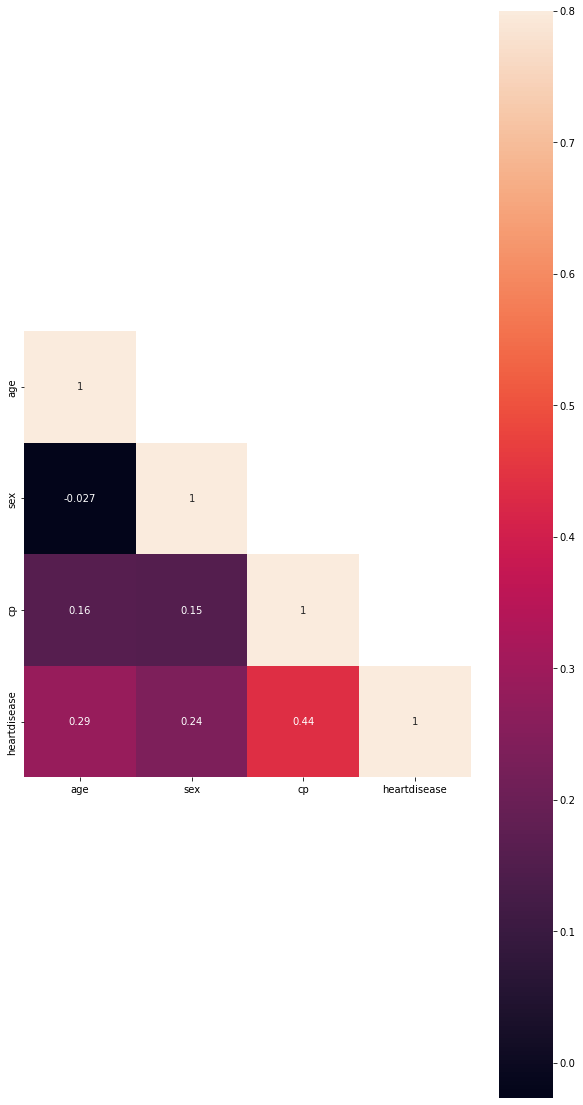

In [13]:
#Correlation Analysis
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,20)
sn.heatmap(corrMatt, mask=mask, vmax=0.8, square=True, annot=True)